<a href="https://colab.research.google.com/github/Mashaell22/repot5/blob/main/Copy_of_Task_1_Artificial_Neural_Networks_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [1]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

but Gdown can't. Please check connections and permissions.


In [2]:

!pip install gdown

!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

!unzip Bus_Breakdown_and_Delays.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

but Gdown can't. Please check connections and permissions.
unzip:  cannot find or open Bus_Breakdown_and_Delays.zip, Bus_Breakdown_and_Delays.zip.zip or Bus_Breakdown_and_Delays.zip.ZIP.


## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [8]:
file_path = '/Users/username/Documents/Bus_Breakdown_and_Delays.csv'

In [17]:
# Load the dataset
file_path = 'Bus_Breakdown_and_Delays.csv'
bus_data = pd.read_csv(file_path)

# shown the first few rows
bus_data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Bus_Breakdown_and_Delays.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Dataset structure
bus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [ ]:
#summary statistics for numerical features
bus_data.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [ ]:
# Check for missing values in the dataset
missing_values = bus_data.isnull().sum()
missing_values[missing_values > 0]

,0
Run_Type,89
Route_Number,88
Reason,102
Boro,6318
How_Long_Delayed,21630
Incident_Number,142340


In [ ]:
# Drop columns with too many missing values (optional, based on your analysis)
bus_data = bus_data.drop(columns=['Incident_Number'])

In [ ]:
#convert values ​​in "How_Long_Delayed" column to numeric type
bus_data['How_Long_Delayed'] = pd.to_numeric(bus_data['How_Long_Delayed'], errors='coerce')


In [ ]:
#Verfy the data type after conversion
bus_data['How_Long_Delayed'].dtype


dtype('float64')

In [ ]:
#Fils missing values ​​for numeric features with the mean
bus_data['How_Long_Delayed'].fillna(bus_data['How_Long_Delayed'].mean(), inplace=True)


In [ ]:

bus_data.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [ ]:
# Fill missing values ​​for categorical features with the most frequent value
bus_data['Run_Type'].fillna(bus_data['Run_Type'].mode()[0], inplace=True)
bus_data['Route_Number'].fillna(bus_data['Route_Number'].mode()[0], inplace=True)
bus_data['Reason'].fillna(bus_data['Reason'].mode()[0], inplace=True)
bus_data['Boro'].fillna(bus_data['Boro'].mode()[0], inplace=True)


In [ ]:
bus_data.dropna(inplace=True)

In [ ]:
bus_data.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,0


In [ ]:
# Plot distributions of numerical features
num_cols = bus_data.select_dtypes(include=['float64', 'int64']).columns

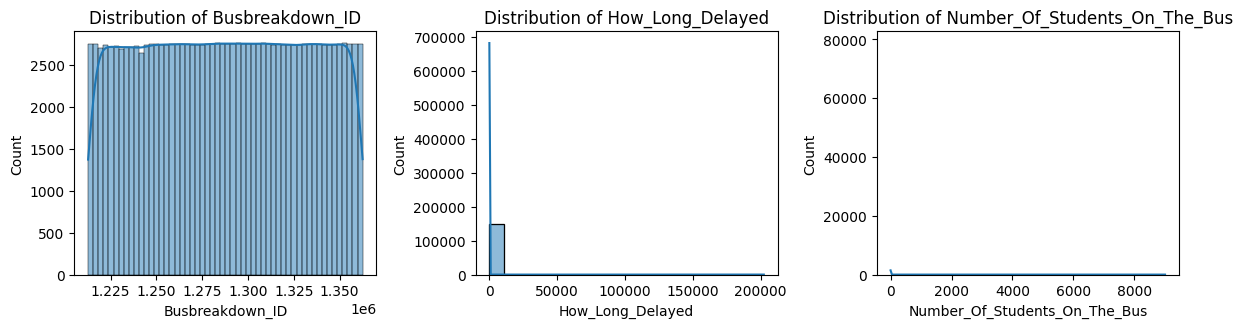

In [ ]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(bus_data[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

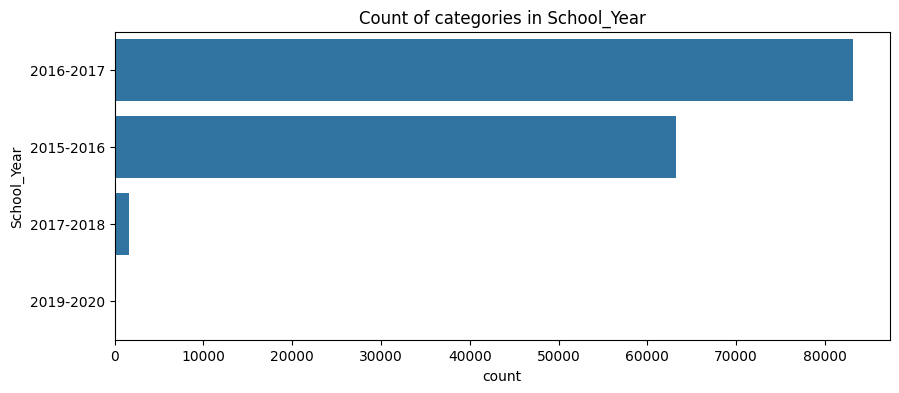

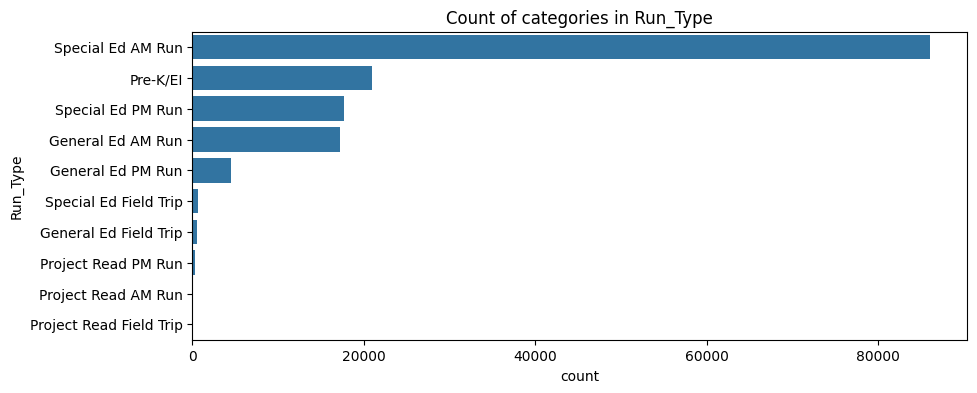

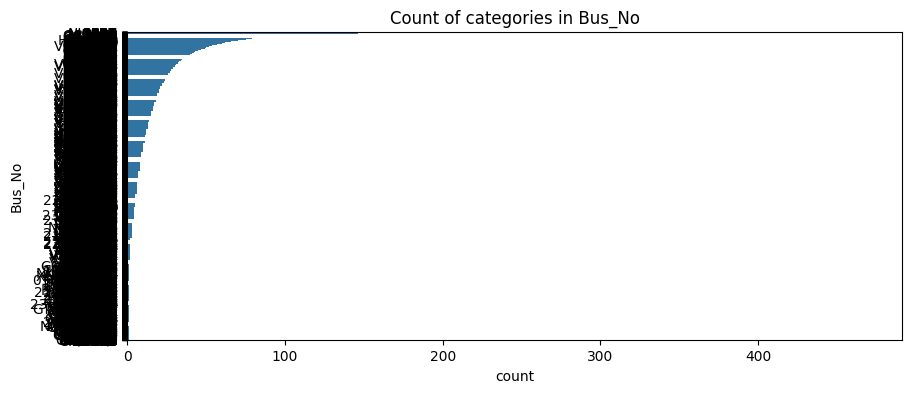

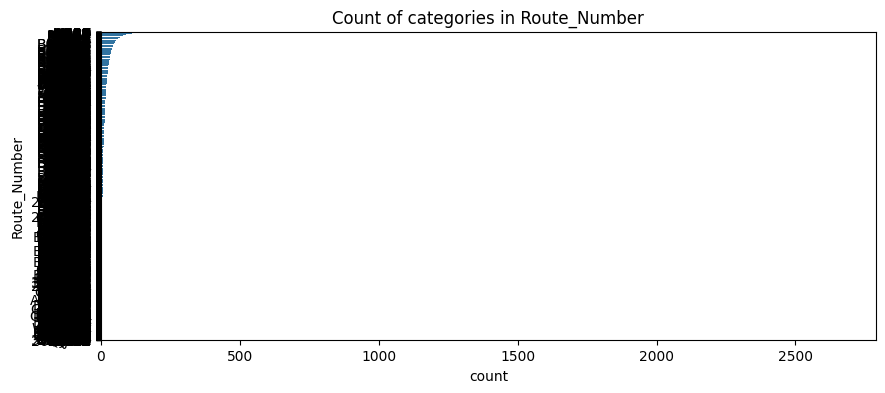

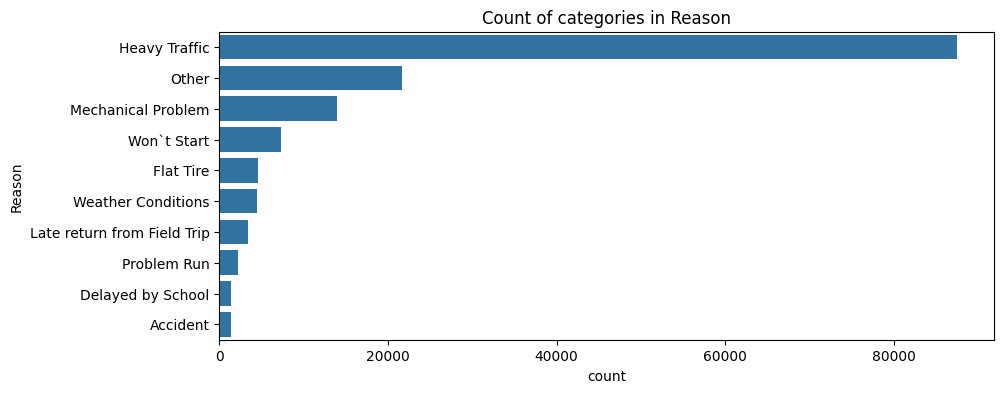

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


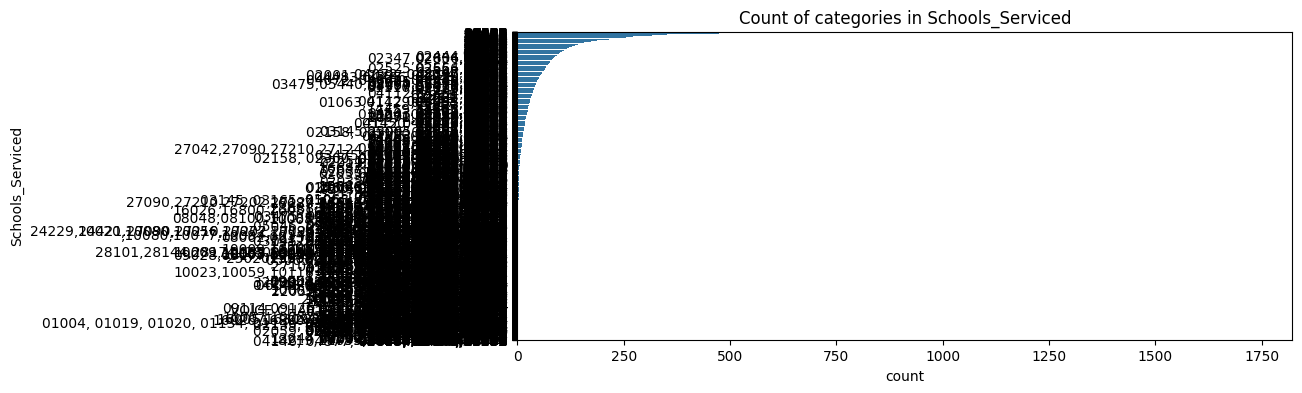

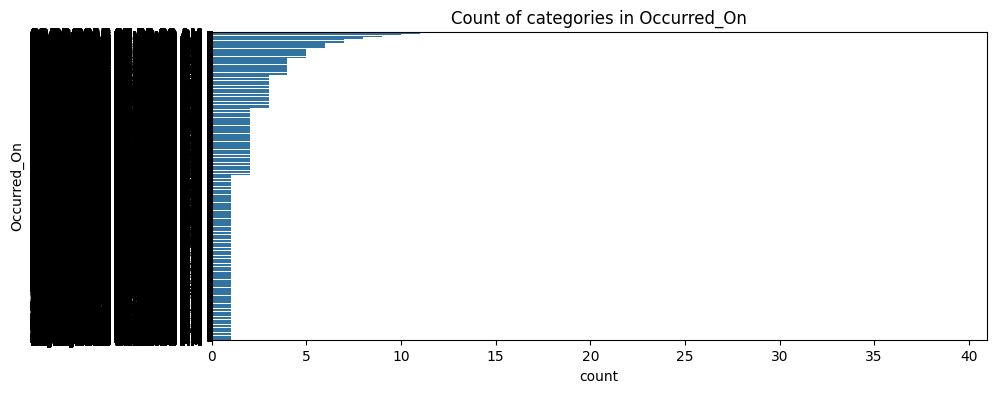

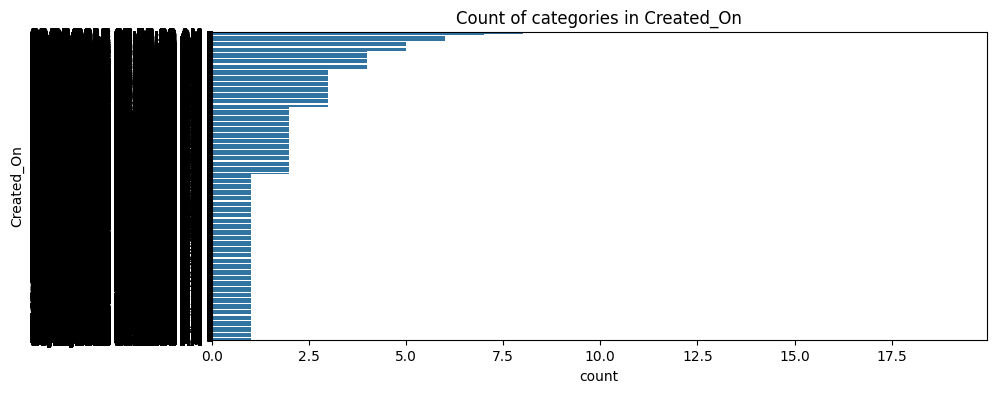

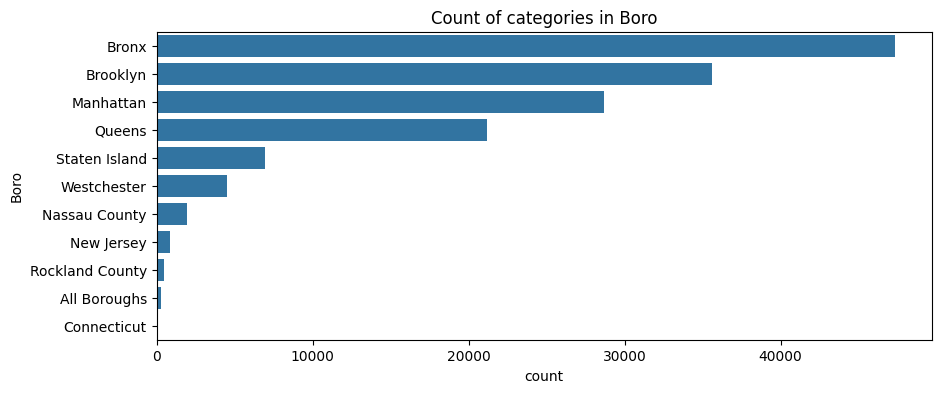

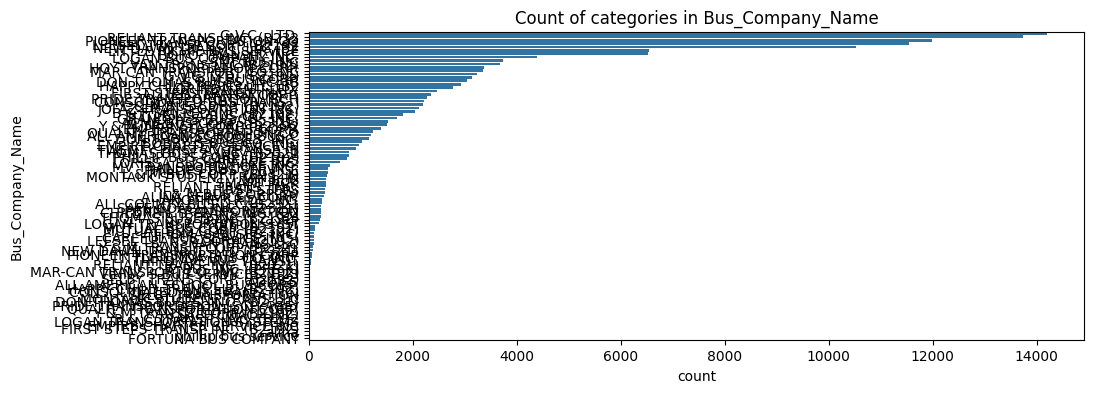

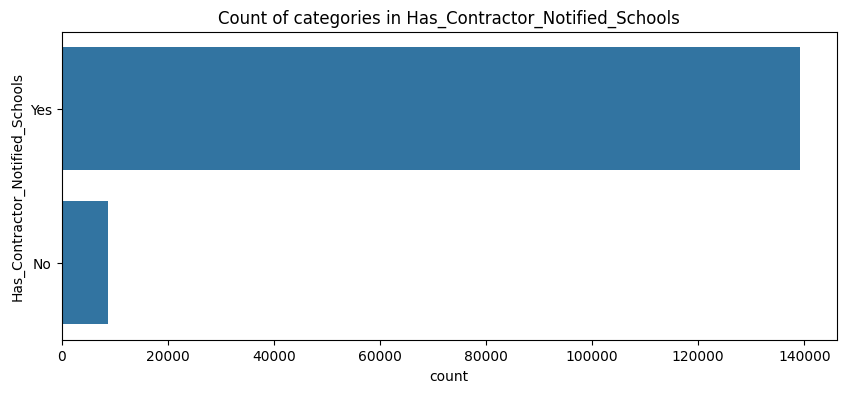

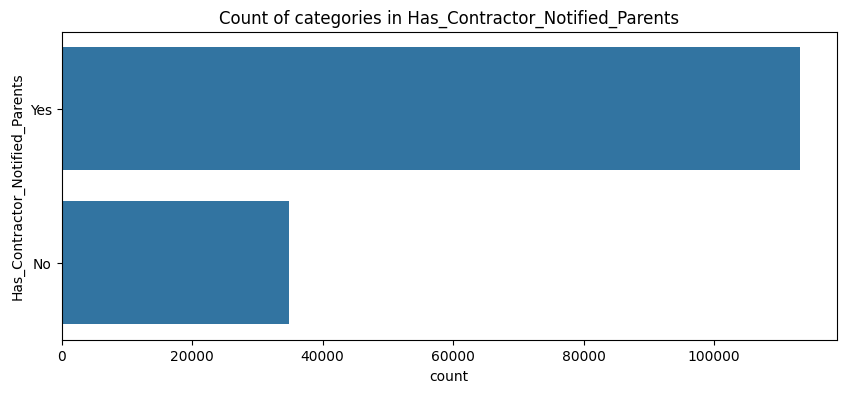

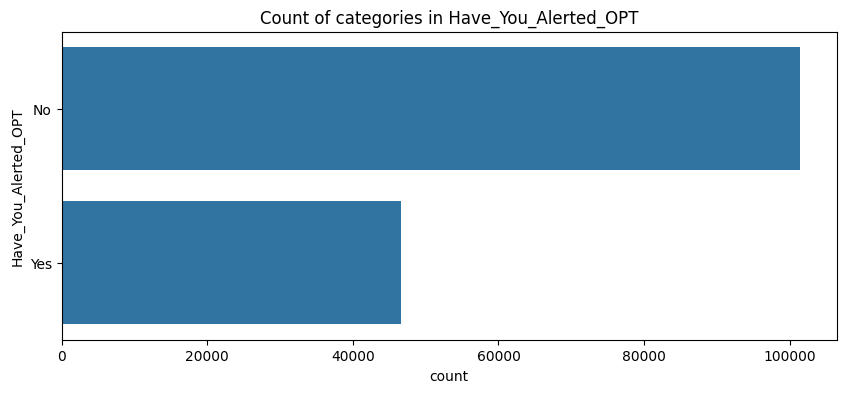

KeyboardInterrupt: 

In [ ]:
#Categoriclfeature analysis
cat_cols = bus_data.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=bus_data[col], order=bus_data[col].value_counts().index)
    plt.title(f'Count of categories in {col}')
    plt.show()

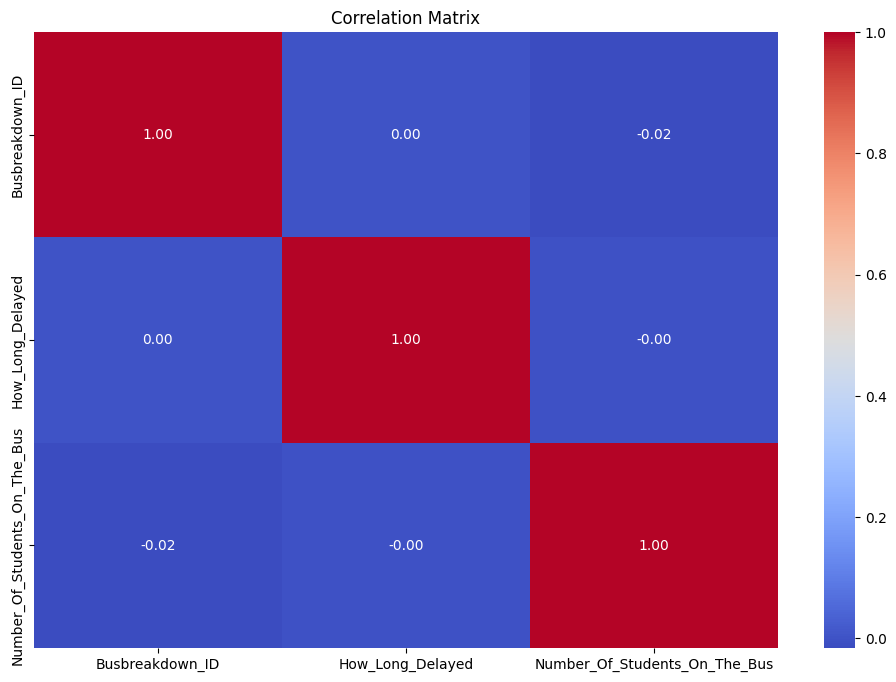

In [ ]:
# only numeric columns for correlation matrix
numeric_cols = bus_data.select_dtypes(include=['number']).columns
corr_matrix = bus_data[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

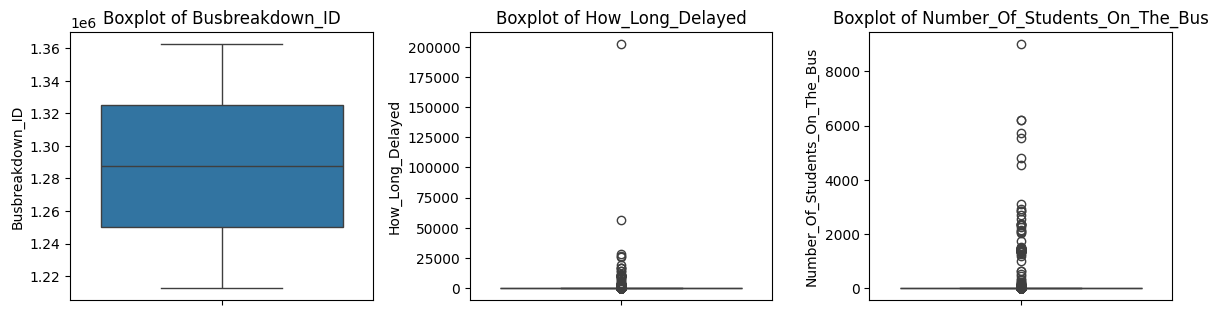

In [ ]:
#outliers detect byy box plots
plt.figure(figsize=(16, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=bus_data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [ ]:
# Label encode the target variable
label_encoder = LabelEncoder()
bus_data['Breakdown_or_Running_Late'] = label_encoder.fit_transform(bus_data['Breakdown_or_Running_Late'])

In [ ]:
# Onehotencode
categorical_cols = bus_data.select_dtypes(include=['object']).columns
bus_data = pd.get_dummies(bus_data, columns=categorical_cols, drop_first=True)

In [ ]:
#Separat features and target
X = bus_data.drop('Breakdown_or_Running_Late', axis=1)
y = bus_data['Breakdown_or_Running_Late']

NameError: name 'bus_data' is not defined

In [ ]:
# Handle imbalanced data using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Scale the features using Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [ ]:
# Split the dataset into trainng and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Check the shapes of the datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [ ]:
#the ANN model
model = Sequential()

In [ ]:
# Input layer and the first hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

In [ ]:
# Second hidden layer
model.add(Dense(units=32, activation='relu'))

In [ ]:
# Third hidden layer (optional)
model.add(Dense(units=16, activation='relu'))

In [ ]:
# Output layer
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [ ]:
# Compile the model
model.compile(optimizer='adam',         # Optimizer
              loss='binary_crossentropy', # Loss function cuz binary classification
              metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [ ]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=32)

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [ ]:
evaluation = model.evaluate(X_test, y_test, verbose=0)
loss = evaluation[0]
accuracy = evaluation[1]
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)
# Convert the predicted  to class label (0 or 1)
y_pred_classes = (y_pred > 0.5).astype("int32")
# Display the first 10 predictions
print(y_pred_classes[:10])  # Show the first 10 predictd classes


## Save the Model
Save the trained model for submission.

In [ ]:
model.save('bus_breakdown_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

**Q1-** I used normalization to ensure all features on the same scale, and I use one-hot encoding to categorical variables to convert them into a numerical format.

**Q2-** Three hidden layers using ReLU af cuz it balances complexity and efficiency.

**Q3** I used a batch size of 32 and trained the model for 50 epochs and the Adam optimizr.

**Q4** binary cross entropy for the loss function cuz its a binary classification.

